# Model predicting whether the client will subscribe a term deposit or not

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
bm_db = pd.read_csv('bank-additional-full.csv')

In [27]:
bm_db.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [28]:
bm_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [29]:
bm_db.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [30]:
bm_db['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [31]:
columns = ['age', 'duration', 'campaign']

In [32]:
bm_db[columns].head()

,age,duration,campaign
0,56,261,1
1,57,149,1
2,37,226,1
3,40,151,1
4,56,307,1


# Feature Engineering 

In [39]:
# Encoding the target variable
encoded_y = pd.get_dummies(bm_db.y)
encoded_y.head()

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [44]:
# Apending the encoded data to the dataframe
bm_db[['no', 'yes']] = encoded_y

In [45]:
bm_db.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,no,yes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0


In [46]:
bm_db['no'].value_counts()

1    36548
0     4640
Name: no, dtype: int64

In [50]:
bm_db.drop(['y', 'no'], axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,yes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


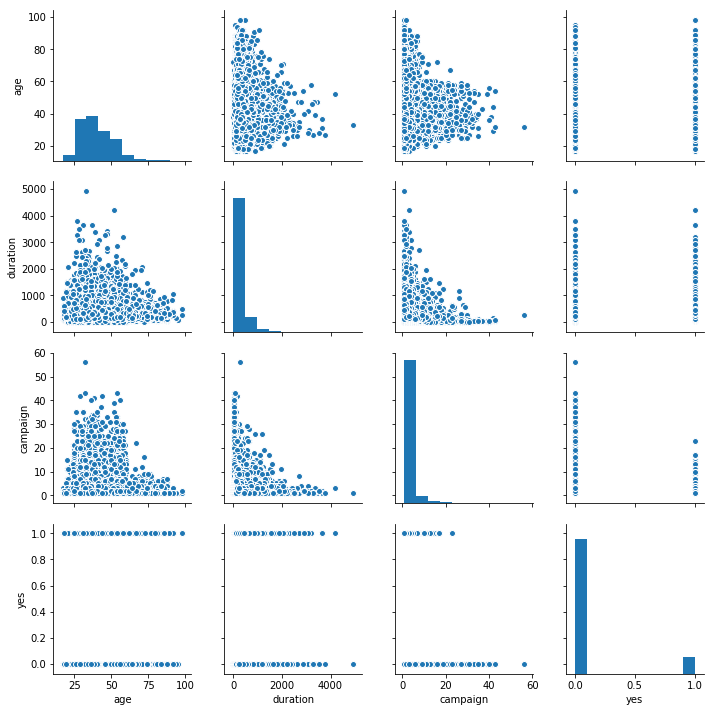

In [51]:
# Pairplot
sns.pairplot(bm_db[['age', 'duration', 'campaign', 'yes']])

# Spliting the data

In [52]:
# Feature Data 
X = bm_db[columns]

# Target Data
y = bm_db.yes

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [54]:
X_train.shape

(28831, 3)

# Model

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

In [56]:
# Train accuracy
model.score(X_train, y_train)

0.8924421629496029

In [57]:
# Test Accuracy
model.score(X_test, y_test)

0.8945536942623614

# Testing the model

In [58]:
bm_db[columns].iloc[100]

age          54
duration    229
campaign      1
Name: 100, dtype: int64

In [59]:
test_data = np.array([23, 240, 2])

In [60]:
test_data.shape

(3,)

In [74]:
test_data = np.array([23, 240, 2]).reshape(1, 3)
test_data.shape

(1, 3)

In [75]:
# predicting the probability
print("Predicted probability for class '0' and '1' respectively:", model.predict_proba(test_data))

Predicted probability for class '0' and '1' respectively: [[0.9286853 0.0713147]]


In [76]:
print("Predicted the class of the test data", model.predict(test_data))

Predicted the class of the test data [0]


# Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix
train_conf_matrix = confusion_matrix(y_train, model.predict(X_train))
train_conf_matrix = pd.DataFrame(train_conf_matrix, columns=['yes', 'no'], index=['yes', 'no'])
train_conf_matrix

,yes,no
yes,25201,372
no,2729,529
